In [1]:
#import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import rioxarray

In [14]:
#read the csv file
df = pd.read_csv('/SNOWDATA/Nah/more-sites-with-lidar/Cameron/lidar/cam_var.csv')

#drop NAN
df = df.dropna()
df

,SD_1,ELEV_1,ASP_1,VH_1
0,2.102783,3345.960449,111.170547,0.099609
3,2.445068,3369.310059,311.633545,0.010010
4,1.223145,3036.556641,339.102234,0.183350
5,1.142090,3211.142334,350.005524,0.127686
7,1.235352,3209.312256,59.537987,5.747803
...,...,...,...,...
35992,1.018066,3347.600342,307.677155,9.509766
35993,1.192627,3159.178223,30.305550,0.001709
35995,1.623779,3245.068115,33.759464,0.141846
35998,1.578369,3232.786865,30.462994,0.133057


In [15]:
# Remove outliers
df = df[(df['SD_1'] > 0) & (df['SD_1'] < 5) ]

# Define aspects (N,E,S,W)
aspects = [
    ((df['ASP_1'] >= 315) | (df['ASP_1'] < 45)),
    ((df['ASP_1'] >= 45) & (df['ASP_1'] < 135)),
    ((df['ASP_1'] >= 135) & (df['ASP_1'] < 225)),
    ((df['ASP_1'] >= 225) & (df['ASP_1'] < 315))
]

nesw = [0, 1, 2, 3]


# Use np select to apply conditions and values
df['ASP_1'] = np.select(aspects, nesw)

#Define elevation classes
elevations = [(df['ELEV_1'] < 1800),
              ((df['ELEV_1'] >= 1800) & (df['ELEV_1'] < 2100)),
                (df['ELEV_1'] >= 2100)]

elevation_class = ['Low [<1800]', 'Mid [1800-2100]', 'High >2100']

# Use np select to apply conditions and values
df['elevation_class'] = np.select(elevations, elevation_class)

df

/tmp/ipykernel_25341/2403105832.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ASP_1'] = np.select(aspects, nesw)
/tmp/ipykernel_25341/2403105832.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['elevation_class'] = np.select(elevations, elevation_class)


,SD_1,ELEV_1,ASP_1,VH_1,elevation_class
0,2.102783,3345.960449,1,0.099609,High >2100
3,2.445068,3369.310059,3,0.010010,High >2100
4,1.223145,3036.556641,0,0.183350,High >2100
5,1.142090,3211.142334,0,0.127686,High >2100
7,1.235352,3209.312256,1,5.747803,High >2100
...,...,...,...,...,...
35991,1.158203,3376.816406,1,0.083496,High >2100
35992,1.018066,3347.600342,3,9.509766,High >2100
35993,1.192627,3159.178223,0,0.001709,High >2100
35995,1.623779,3245.068115,0,0.141846,High >2100


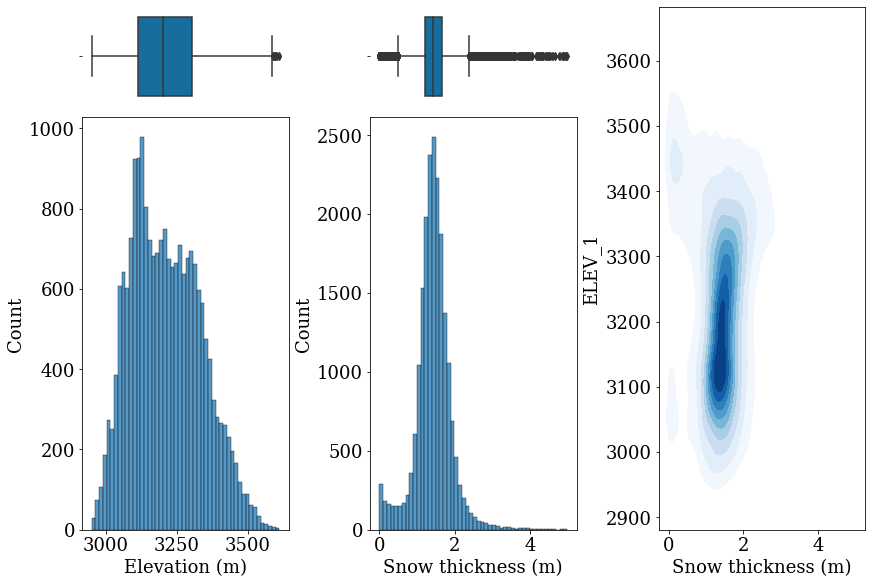

In [11]:
# Set font size and font family
plt.rcParams.update({'font.size': 18})
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

#create figure and gridspec object
fig = plt.figure(figsize=(12,8), constrained_layout=True)
gspec = fig.add_gridspec(ncols=3, nrows=5)

ax0 = fig.add_subplot(gspec[0, 0])
ax1 = fig.add_subplot(gspec[0, 1])
ax2 = fig.add_subplot(gspec[1:6, 0])
ax3 = fig.add_subplot(gspec[1:6, 1])
ax4 = fig.add_subplot(gspec[0:6, 2])

#plot the histogram and boxplot of snow thickness and elevation
sns.boxplot(x= df['SD_1'], ax=ax1, palette= 'colorblind')
sns.boxplot(x= df['ELEV_1'], ax=ax0, palette= 'colorblind')
sns.histplot(data = df, x ='SD_1', ax=ax3, bins=50)
sns.histplot(data = df, x ='ELEV_1', ax=ax2, bins=50)
sns.kdeplot(data = df, x = 'SD_1', y = 'ELEV_1', shade=True, ax=ax4, cmap='Blues')

#set x-axis labels
ax0.set_xlabel('')
ax1.set_xlabel('')
ax2.set_xlabel('Elevation (m)')
ax3.set_xlabel('Snow thickness (m)')
ax4.set_xlabel('Snow thickness (m)')

# #set y-axis labels
# ax2.set_ylabel('Area (km$^2$)')
# ax3.set_ylabel('Area (km$^2$)')
# ax4.set_ylabel('Elevation (m)')

#remove tick of the firstand second  axes
ax0.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)


#remove all spines on first axes
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['bottom'].set_visible(False)
ax0.spines['left'].set_visible(False)

#remove all spines on second axes
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)

# #set the y tick labels of ax2
# ax3.set_yticklabels(['0', '0.45', '0.9', '1.35', '1.8', '2.25'])
# ax2.set_yticklabels(['0', '0.18', '0.36', '0.54', '0.72', '0.9', '1.08', '1.26'], horizontalalignment='right')

# #save figure
# fig.savefig('snow_elev_hist2.jpeg', dpi=600)

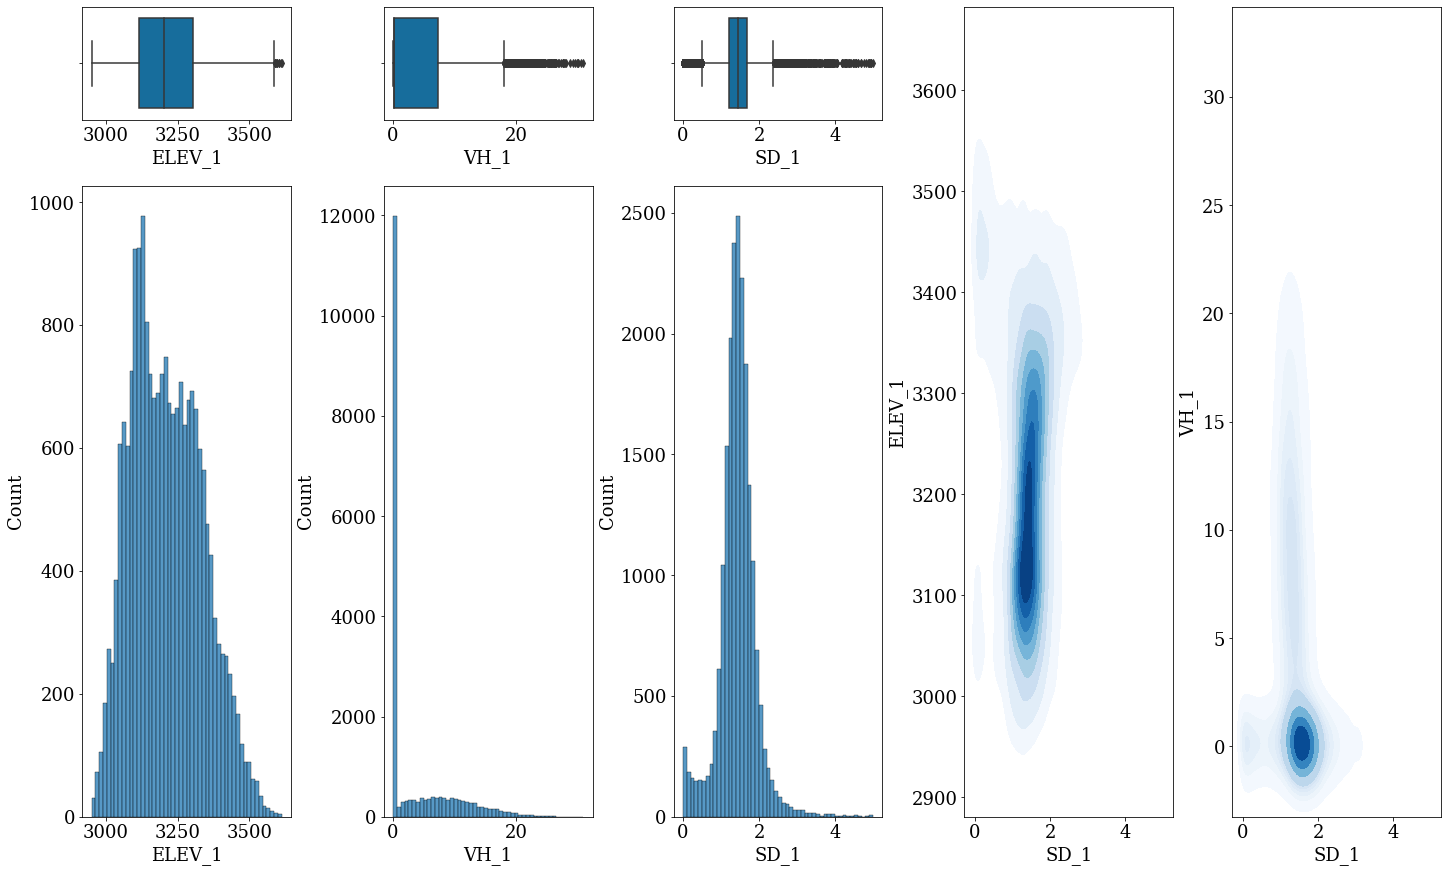

In [12]:
# Set font size and font family
plt.rcParams.update({'font.size': 18})
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

#create figure and gridspec object
fig = plt.figure(figsize=(20,12), constrained_layout=True)
gspec = fig.add_gridspec(ncols=5, nrows=5)

ax0 = fig.add_subplot(gspec[0, 0])
ax1 = fig.add_subplot(gspec[0, 1])
ax2 = fig.add_subplot(gspec[0, 2])
ax3 = fig.add_subplot(gspec[1:5, 0])
ax4 = fig.add_subplot(gspec[1:5, 1])
ax5 = fig.add_subplot(gspec[1:5, 2])
ax6 = fig.add_subplot(gspec[0:5, 3])
ax7 = fig.add_subplot(gspec[0:5, 4])

# plot the boxplot of elevation, vegetation and snow thickness
sns.boxplot(x= df['ELEV_1'], ax=ax0, palette= 'colorblind')
sns.boxplot(x= df['VH_1'], ax=ax1, palette= 'colorblind')
sns.boxplot(x= df['SD_1'], ax=ax2, palette= 'colorblind')

# plot the histogram and boxplot of elevation, vegetation and snow thickness
sns.histplot(data = df, x ='ELEV_1', ax=ax3, bins=50)
sns.histplot(data = df, x ='VH_1', ax=ax4, bins=50)
sns.histplot(data = df, x ='SD_1', ax=ax5, bins=50)

#make the scatter plot of elevation vs snow thickness and vegetation vs snow thickness
sns.kdeplot(data = df, x = 'SD_1', y = 'ELEV_1', shade=True, ax=ax6, cmap='Blues')
#set xlimt and y limt
ax6.set_xlim(0, 2.5)
ax6.set_ylim(2900, 3500)

sns.kdeplot(data = df, x = 'SD_1', y = 'VH_1', shade=True, ax=ax7, cmap='Blues')
#set xlimt and y limt
ax7.set_xlim(0, 2.5)
ax7.set_ylim(-5, 20)

# #set x-axis labels
# ax0.set_xlabel('')
# ax1.set_xlabel('')


# #set y-axis labels
# ax2.set_ylabel('')


# #remove tick of the firstand second  axes
# ax0.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
# ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)




# #remove all spines on first axes
# ax0.spines['top'].set_visible(False)
# ax0.spines['right'].set_visible(False)
# ax0.spines['bottom'].set_visible(False)
# ax0.spines['left'].set_visible(False)

# #remove all spines on second axes
# ax1.spines['top'].set_visible(False)
# ax1.spines['right'].set_visible(False)
# ax1.spines['bottom'].set_visible(False)
# ax1.spines['left'].set_visible(False)

plt.show()

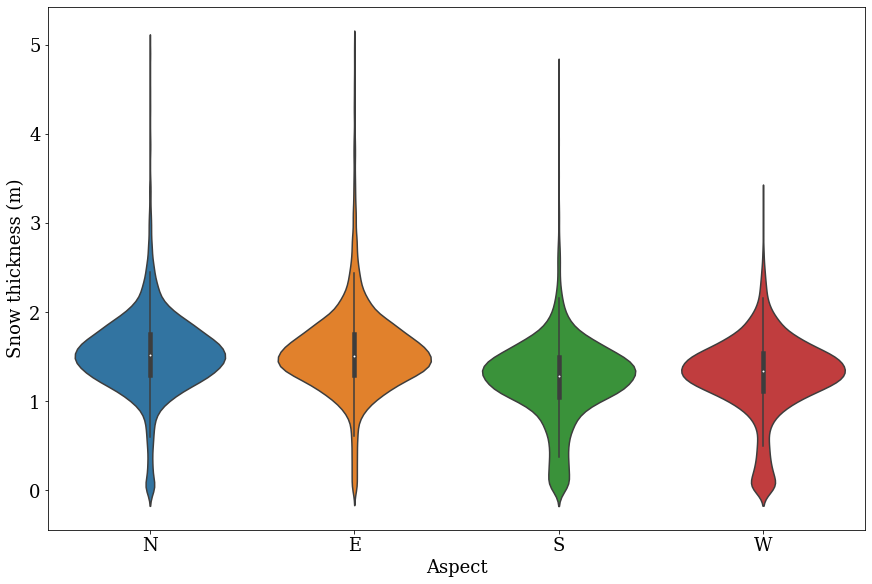

In [16]:
#create figure object, axes and subplots
fig, ax = plt.subplots( figsize = (12, 8), constrained_layout=True) 

sns.violinplot(x= df['ASP_1'], y = df['SD_1'])

#label the x axes
plt.xlabel('Aspect')
plt.ylabel('Snow thickness (m)')

#x axis tick labels
plt.xticks([0,1,2,3], ['N', 'E', 'S', 'W'])


plt.show()

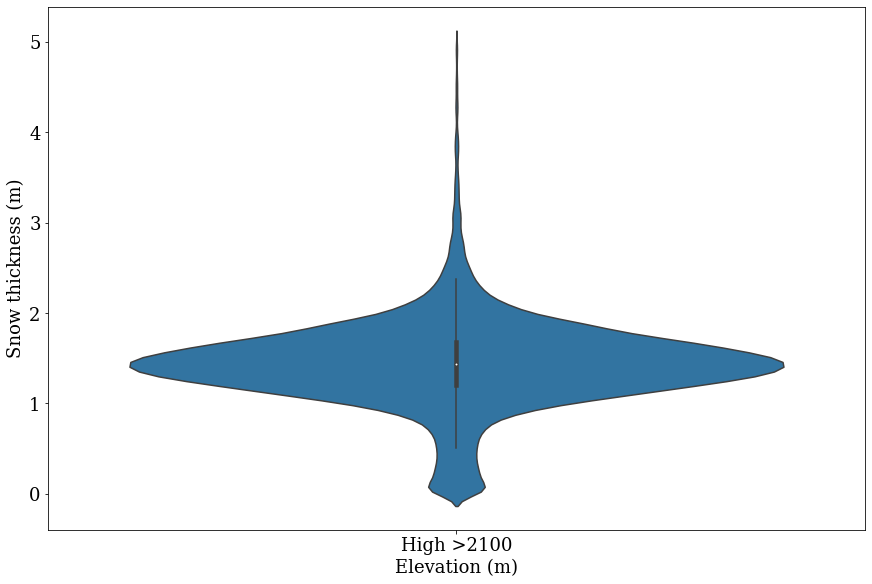

In [18]:
#create figure object, axes and subplots
fig, ax = plt.subplots( figsize = (12, 8), constrained_layout=True) 

sns.violinplot(x= df['elevation_class'], y = df['SD_1'])

#label the x axes
plt.xlabel('Elevation (m)')
plt.ylabel('Snow thickness (m)')

#x axis tick labels

plt.show()